In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# directory to save figures
save_figs = ""

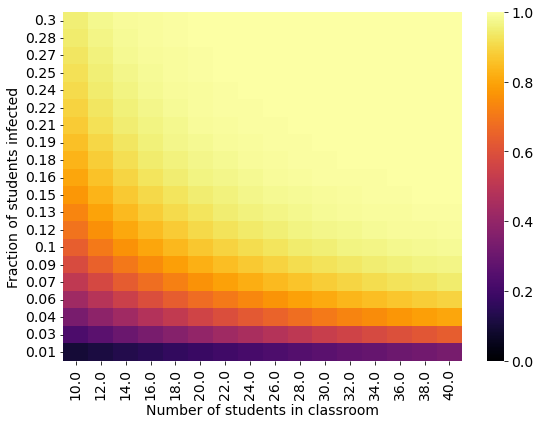

In [18]:
# Fig. 8A

sweep_pop_prevalence = np.linspace(0.01,0.3, num=20)
sweep_num_students = np.linspace(10,40, num=16)

plot_prev = []
plot_num = []
plot_prob = []
for i in sweep_pop_prevalence:
    for j in sweep_num_students:
        mean = i*j
        plot_prob.append(1-stats.poisson.cdf(0,mean))
        plot_num.append(j)
        plot_prev.append(i)
        
to_plot = pd.DataFrame({"prev":plot_prev, "num":plot_num, "prob":plot_prob})

to_plot = pd.pivot_table(to_plot, values="prob", index="prev", columns="num") 

plt.figure(figsize=(8,6))
ax = sns.heatmap(to_plot, cmap="inferno", vmin=0, vmax=1)
ax.invert_yaxis()
plt.yticks(ticks=np.arange(len(to_plot.index))+0.5, labels=[round(x, 2) for x in to_plot.index], fontsize=14)
plt.xticks(ticks=np.arange(len(to_plot.columns))+0.5, labels=[round(x, 0) for x in to_plot.columns], fontsize=14)
plt.xlabel("Number of students in classroom", fontsize=14)
plt.ylabel("Fraction of students infected", fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig(save_figs+"prob_infected_heatmap.eps", transparent=True)
plt.show()

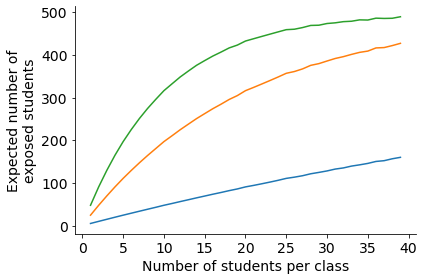

In [23]:
# Fig. 8B

sweep_pop_prevalence = [0.01, 0.05, 0.1]
sweep_num_students = np.arange(1,40)
total_students = 500

plot_prev = []
plot_num = []
plot_exp = []
for i in sweep_pop_prevalence:
    for j in sweep_num_students:
        num_classes = np.floor(total_students/j)
        exp_exposed = num_classes*j*(1-stats.poisson.cdf(0,j*i)) + (total_students % j)*(1-stats.poisson.cdf(0,(total_students % j)*i))
        plot_exp.append(exp_exposed)
        plot_num.append(j)
        plot_prev.append(i)
        
to_plot = pd.DataFrame({"prev":plot_prev, "num":plot_num, "exposed":plot_exp})

plt.figure()
add_plot = to_plot[to_plot["prev"]==0.01]
plt.plot(add_plot["num"], add_plot["exposed"])
add_plot = to_plot[to_plot["prev"]==0.05]
plt.plot(add_plot["num"], add_plot["exposed"])
add_plot = to_plot[to_plot["prev"]==0.1]
plt.plot(add_plot["num"], add_plot["exposed"])
plt.xlabel("Number of students per class", fontsize=14)
plt.ylabel("Expected number of\nexposed students", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.tight_layout()
#plt.savefig(save_figs+"exposed.eps", transparent=True)
plt.show()